In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams
rcParams['figure.figsize'] = 10, 4

In [2]:
df = pd.read_excel('Cafe_Data.xlsx')

#### EDA


In [10]:
df.head()

,Date,Bill Number,Item Desc,Time,Quantity,Rate,Tax,Discount,Total,Category
0,2010-04-01,G0470115,QUA MINERAL WATER(1000ML),13:15:11,1,50.0,11.88,0.0,61.88,BEVERAGE
1,2010-04-01,G0470115,MONSOON MALABAR (AULAIT),13:15:11,1,100.0,23.75,0.0,123.75,BEVERAGE
2,2010-04-01,G0470116,MASALA CHAI CUTTING,13:17:35,1,40.0,9.50,0.0,49.50,BEVERAGE
3,2010-04-01,G0470117,QUA MINERAL WATER(1000ML),13:19:55,1,50.0,11.88,0.0,61.88,BEVERAGE
4,2010-04-01,G0470283,MOROCCAN MINT TEA,01:20:18,1,45.0,10.69,0.0,55.69,BEVERAGE


In [11]:
df.shape

(145830, 10)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145830 entries, 0 to 145829
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Date          145830 non-null  datetime64[ns]
 1   Bill Number   145830 non-null  object        
 2   Item Desc     145830 non-null  object        
 3   Time          145830 non-null  object        
 4   Quantity      145830 non-null  int64         
 5   Rate          145830 non-null  float64       
 6   Tax           145830 non-null  float64       
 7   Discount      145830 non-null  float64       
 8   Total         145830 non-null  float64       
 9   Category      145830 non-null  object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(4)
memory usage: 11.1+ MB


In [16]:
df.Category.unique()

array(['BEVERAGE', 'FOOD', 'LIQUOR', 'MERCHANDISE', 'TOBACCO', 'MISC',
       'WINES', 'LIQUOR & TOBACCO'], dtype=object)

In [14]:
df.isna().sum()

Date            0
Bill Number     0
Item Desc       0
Time            0
Quantity        0
Rate            0
Tax             0
Discount        0
Total           0
Category        0
dtype: int64

In [15]:
df['Item Desc'] = df['Item Desc'].apply(lambda x: x.strip())
df['Category'] = df['Category'].apply(lambda x: x.strip())

In [18]:
df['Item Desc'].nunique()

580

In [19]:
df.duplicated().sum()

680

In [20]:
df[df.duplicated()]

,Date,Bill Number,Item Desc,Time,Quantity,Rate,Tax,Discount,Total,Category
198,2010-04-01,G0470211,B.M.T. PANINI,19:42:27,1,105.0,24.94,0.0,129.94,FOOD
199,2010-04-01,G0470211,B.M.T. PANINI,19:42:27,1,105.0,24.94,0.0,129.94,FOOD
244,2010-04-01,G0470270,B.M.T. PANINI,00:08:20,1,105.0,24.94,0.0,129.94,FOOD
551,2010-05-01,G0474965,PHILLYCREAM CHEESE &CHILLY PAN,13:33:51,1,105.0,24.94,0.0,129.94,FOOD
588,2010-05-01,G0475009,B.M.T. PANINI,17:12:21,1,105.0,24.94,0.0,129.94,FOOD
...,...,...,...,...,...,...,...,...,...,...
144615,2010-10-31,G0506562,DOPPIO,19:08:48,1,60.0,14.25,0.0,74.25,BEVERAGE
144727,2010-10-31,G0506566,CHEESE CAKE OF THE WEEK,19:20:52,1,105.0,24.94,0.0,129.94,FOOD
145129,2010-12-31,G0517963,CAPPUCCINO,20:50:13,1,60.0,14.25,0.0,74.25,BEVERAGE
145255,2010-12-31,G0517869,PHILLYCREAM CHEESE &CHILLY PAN,15:12:41,1,105.0,24.94,0.0,129.94,FOOD


In [21]:
df.drop_duplicates(inplace=True)

In [22]:
df.duplicated().sum()

0

In [23]:
df.shape

(145150, 10)

In [26]:
df.describe()

,Quantity,Rate,Tax,Discount,Total
count,145150.000000,145150.000000,145150.00000,145150.000000,145150.000000
mean,1.121826,161.727783,48.93175,0.095307,224.971683
std,0.478249,102.213514,40.28672,3.728524,165.052799
min,1.000000,0.010000,0.00000,0.000000,0.010000
25%,1.000000,95.000000,22.56000,0.000000,117.560000
50%,1.000000,125.000000,32.06000,0.000000,167.060000
75%,1.000000,225.000000,72.00000,0.000000,315.000000
max,30.000000,2100.000000,2731.25000,825.000000,14231.250000


#### Market Basket Analysis

In [35]:
df_1 = df.groupby(['Bill Number ','Item Desc'])['Quantity'].sum().unstack().reset_index().fillna(0).set_index('Bill Number ')

In [36]:
df_1.head()

Item Desc,1 AXE TWIST,1+1 BTL4 SEASON WHITE,1+1 GLS 4SEASON RED,1+1 GLS 4SEASONS WHITE,1+1 KF 1 LITER,1+1 KF 1/2 LITER,1+1 KF 2 LITER,1+1 VLN CAB SAUV (BTL),1+1 VLN CAB SAUV (GLS),1+1 VLN CAB SAUV CLASIQ (BTL),...,WHITE WINE SHEESHA,WILD MUSHROOM LINGUINI,YEMENI GREAT LAKES (AULAIT),YEMENI GREAT LAKES (REG),YIN N YANG FONDUE,ZEN ROCK SQUARE VASE,ZERO SIZE SHOT GLS,ZINZI RED (GLS),ZINZI WHITE (GLS),ZINZI WHITE (BTL)
Bill Number,,,,,,,,,,,,,,,,,,,,,
G0470109,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
G0470110,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
G0470111,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
G0470112,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
G0470113,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [37]:
def encode(x): 
    if(x<= 0): 
        return 0
    if(x>= 1): 
        return 1
    
df_2=df_1.applymap(encode) 

In [41]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [42]:
itemsets = apriori(df_2, min_support = 0.0001, use_colnames = True, low_memory=True)
itemsets

,support,itemsets
0,0.000157,(1+1 GLS 4SEASON RED)
1,0.000129,(1+1 GLS 4SEASONS WHITE)
2,0.000600,(1+1 KF 1 LITER)
3,0.001586,(1+1 KF 1/2 LITER)
4,0.000100,(1+1 KF 2 LITER)
...,...,...
6196,0.000114,"(RED BULL ENERGY DRINK, N R G HOOKAH, SAMBUCA..."
6197,0.000114,"(RED BULL 2+1, SAMBUCA, PHILLYCREAM CHEESE &CH..."
6198,0.000129,"(RED BULL 2+1, SAMBUCA, POUTINE WITH FRIES, QU..."
6199,0.000100,"(SAMBUCA, GREAT LAKES SHAKE, QUA MINERAL WATE..."


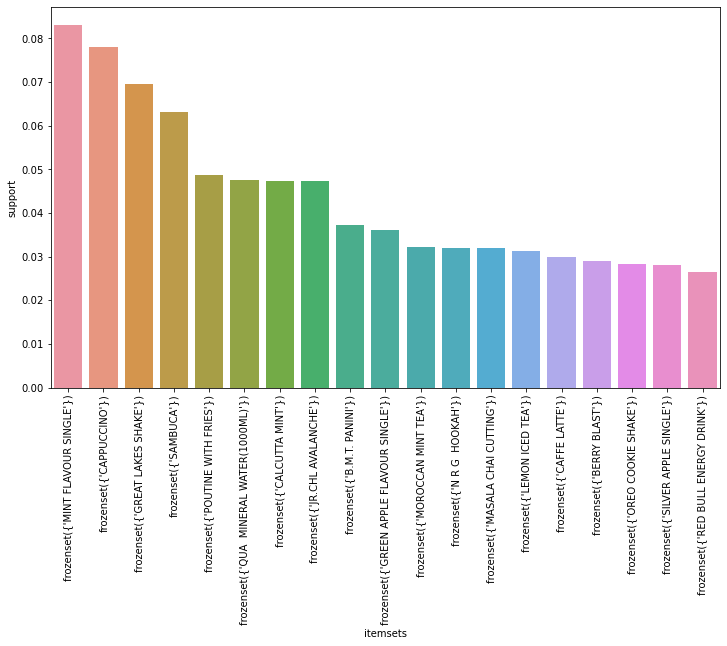

In [43]:
plt.figure(figsize=(12,7))
sns.barplot(itemsets.sort_values('support',ascending=False).iloc[1:20,1],
            itemsets.sort_values('support',ascending=False).iloc[1:20,0])
plt.xticks(rotation=90)
plt.show()

In [44]:
basket = association_rules(itemsets, metric ="lift") 
basket = basket.sort_values(['confidence', 'lift'], ascending =[False, False]) 

In [45]:
basket.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
1,(N R G HOOKAH),(2 RED BULL),0.000214,0.000300,0.000214,1.000000,3332.476190,0.000214,inf
15849,"(RED BULL 2+1, MAGGI NDL ARRABIATA, GREAT LAKE...",(SAMBUCA),0.000100,0.063202,0.000100,1.000000,15.822293,0.000094,inf
15934,"(RED BULL 2+1, PHILLYCREAM CHEESE &CHILLY PAN,...",(SAMBUCA),0.000129,0.063202,0.000129,1.000000,15.822293,0.000120,inf
15005,"(QUA MINERAL WATER(500ML), TOMATOLINO)",(NIRVANA HOOKAH SINGLE),0.000100,0.119874,0.000100,1.000000,8.342115,0.000088,inf
15948,"(RED BULL 2+1, QUA MINERAL WATER(1000ML), GRE...",(SAMBUCA),0.000214,0.063202,0.000200,0.933333,14.767473,0.000187,14.051971
15864,"(RED BULL ENERGY DRINK, MASALA CHAI CUTTING, G...",(SAMBUCA),0.000129,0.063202,0.000114,0.888889,14.064260,0.000106,8.431182
7218,"(3 RED BULL, MIAMI MELONS)",(NIRVANA HOOKAH SINGLE),0.000114,0.119874,0.000100,0.875000,7.299350,0.000086,7.041011
15499,"(RED BULL 2+1, B.M.T. PANINI, GREAT LAKES SHAKE)",(SAMBUCA),0.000200,0.063202,0.000171,0.857143,13.561965,0.000159,6.557586
434,(ADD VANILLA FLAVOUR),(CAFFE LATTE),0.000714,0.029936,0.000572,0.800000,26.723437,0.000550,4.850319
15583,"(MAGGI NDL ARRABIATA, QUA MINERAL WATER(1000M...",(SAMBUCA),0.000357,0.063202,0.000286,0.800000,12.657834,0.000263,4.683990


In [46]:
basket.shape

(16076, 9)

In [47]:
bas = pd.DataFrame(basket)

In [49]:
bas.to_excel('MBA.xlsx')

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text major ticklabel objects>)

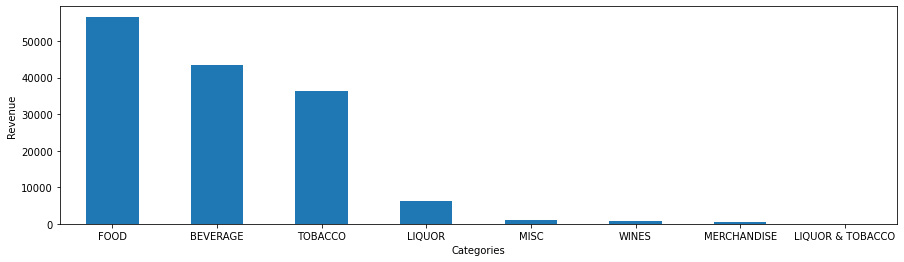

In [41]:
rcParams['figure.figsize'] = 15, 4
df.Category.value_counts().plot(kind='bar')
plt.xlabel('Categories')
plt.ylabel('Revenue')
plt.xticks(rotation=0)


In [19]:
df[df.Category=='LIQUOR & TOBACCO']

,Date,Bill Number,Item Desc,Time,Quantity,Rate,Tax,Discount,Total,Category
53088,2011-03-09,N0033683,2 DOM BEER + 1SPL SHEESHA,22:50:05,1,500.0,156.25,0.0,656.25,LIQUOR & TOBACCO
57949,2011-03-13,G0531015,BEER HOOKAH,18:25:52,1,500.0,160.00,0.0,660.00,LIQUOR & TOBACCO
57950,2011-03-13,G0531091,BEER HOOKAH,23:46:55,1,500.0,160.00,0.0,660.00,LIQUOR & TOBACCO
86272,2011-03-19,G0532021,BEER HOOKAH,23:15:15,1,500.0,160.00,0.0,660.00,LIQUOR & TOBACCO
90761,2011-02-20,N0033387,2 DOM BEER + 1SPL SHEESHA,18:27:43,1,500.0,156.25,0.0,656.25,LIQUOR & TOBACCO
90762,2011-02-20,N0033391,2 DOM BEER + 1SPL SHEESHA,20:42:31,1,500.0,156.25,0.0,656.25,LIQUOR & TOBACCO
91170,2011-03-20,G0532205,BEER HOOKAH,00:36:15,1,500.0,160.00,0.0,660.00,LIQUOR & TOBACCO
95432,2011-02-21,N0033404,4 DOM BEER + 1SPL SHEESHA,13:00:14,1,750.0,234.38,0.0,984.38,LIQUOR & TOBACCO
100044,2011-02-22,N0033421,4 DOM BEER + 1SPL SHEESHA,17:23:36,1,750.0,234.38,0.0,984.38,LIQUOR & TOBACCO
100045,2011-02-22,N0033424,2 DOM BEER + 1SPL SHEESHA,18:06:29,1,500.0,156.25,0.0,656.25,LIQUOR & TOBACCO


In [25]:
df['Bill Number '].nunique()

69982

In [26]:
df.Total.sum()

32654639.75

In [28]:
df.Quantity.sum()

162833

In [29]:
df['Item Desc'] = pd.Categorical(df['Item Desc']).codes

df['Item Desc'] = df['Item Desc'].astype('category')


In [32]:
df['Item Desc'].cat.codes


0         437
1         372
2         356
3         437
4         374
         ... 
145825    578
145826    578
145827    578
145828    578
145829    579
Length: 145150, dtype: int16

In [20]:
df.groupby('Bill Number ')['Item Desc'].apply(list)

Bill Number 
G0470109                   [188]
G0470110                   [477]
G0470111    [149, 424, 200, 456]
G0470112              [437, 398]
G0470113                   [398]
                    ...         
N0034042              [131, 502]
N0034043                   [131]
N0034044                   [538]
N0034045                   [131]
N0034046                   [491]
Name: Item Desc, Length: 69982, dtype: object

In [24]:
df1 = df.groupby('Bill Number ')['Item Desc'].apply(list).reset_index(name='BillItems')

In [25]:
df1.head()

,Bill Number,BillItems
0,G0470109,[188]
1,G0470110,[477]
2,G0470111,"[149, 424, 200, 456]"
3,G0470112,"[437, 398]"
4,G0470113,[398]


In [35]:
df1.to_excel('BillWise_Itemsv0.xlsx')

In [36]:
df.head()

,Date,Bill Number,Item Desc,Time,Quantity,Rate,Tax,Discount,Total,Category
0,2010-04-01,G0470115,437,13:15:11,1,50.0,11.88,0.0,61.88,BEVERAGE
1,2010-04-01,G0470115,372,13:15:11,1,100.0,23.75,0.0,123.75,BEVERAGE
2,2010-04-01,G0470116,356,13:17:35,1,40.0,9.50,0.0,49.50,BEVERAGE
3,2010-04-01,G0470117,437,13:19:55,1,50.0,11.88,0.0,61.88,BEVERAGE
4,2010-04-01,G0470283,374,01:20:18,1,45.0,10.69,0.0,55.69,BEVERAGE


In [38]:
df_bev = df[df['Category'] == 'BEVERAGE']

In [43]:
df_bev.reset_index(inplace=True)

In [45]:
df_fo = df[df['Category'] == 'FOOD']
df_fo.reset_index(inplace=True)

In [46]:
df.Category.unique()

array(['BEVERAGE', 'FOOD', 'LIQUOR', 'MERCHANDISE', 'TOBACCO', 'MISC',
       'WINES', 'LIQUOR & TOBACCO'], dtype=object)

In [47]:
df_li = df[df['Category'] == 'LIQUOR']
df_li.reset_index(inplace=True)

In [48]:
df_to = df[df['Category'] == 'TOBACCO']
df_to.reset_index(inplace=True)

In [49]:
df_mer = df[df['Category'] == 'MERCHANDISE']
df_mer.reset_index(inplace=True)

In [50]:
df_win = df[df['Category'] == 'WINES']
df_win.reset_index(inplace=True)

In [51]:
df_lnt= df[df['Category'] == 'LIQUOR & TOBACCO']
df_lnt.reset_index(inplace=True)

In [53]:
df_to.head()

,index,Date,Bill Number,Item Desc,Time,Quantity,Rate,Tax,Discount,Total,Category
0,272,2010-04-01,G0470116,365,13:17:35,1,225.0,72.0,0.0,297.0,TOBACCO
1,273,2010-04-01,G0470283,398,01:20:18,1,245.0,78.4,0.0,323.4,TOBACCO
2,274,2010-04-01,G0470119,450,13:29:21,1,375.0,120.0,0.0,495.0,TOBACCO
3,275,2010-04-01,G0470284,398,01:29:38,1,245.0,78.4,0.0,323.4,TOBACCO
4,276,2010-04-01,G0470284,440,01:29:38,1,295.0,94.4,0.0,389.4,TOBACCO


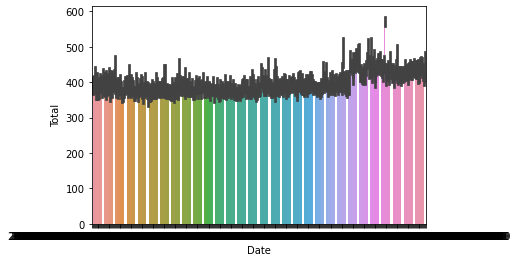

In [54]:
sns.barplot(x='Date',y='Total',data=df_to)

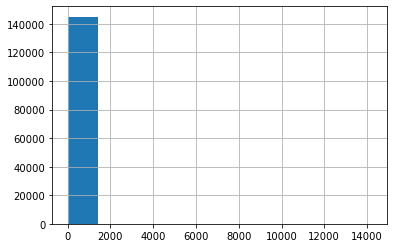

In [56]:
df.Total.hist()

In [13]:
df_ts = df[['Date','Time','Total']]

In [14]:
df_ts

,Date,Time,Total
0,2010-04-01,13:15:11,61.88
1,2010-04-01,13:15:11,123.75
2,2010-04-01,13:17:35,49.50
3,2010-04-01,13:19:55,61.88
4,2010-04-01,01:20:18,55.69
...,...,...,...
145825,2010-05-22,21:43:55,378.00
145826,2010-04-27,20:52:11,378.00
145827,2010-05-28,01:03:37,567.00
145828,2010-04-30,23:44:37,189.00


In [18]:
df_ts.set_index('Date',inplace=True)

In [ ]:
date = pd.date_range(start='1/1/1956', end='1/1/1996', freq='M')
date

In [19]:
df_ts

,Time,Total
Date,,
2010-04-01,13:15:11,61.88
2010-04-01,13:15:11,123.75
2010-04-01,13:17:35,49.50
2010-04-01,13:19:55,61.88
2010-04-01,01:20:18,55.69
...,...,...
2010-05-22,21:43:55,378.00
2010-04-27,20:52:11,378.00
2010-05-28,01:03:37,567.00


In [25]:
df_ts.drop('Time',axis=1,inplace=True)

C:\Users\Nitin Vasista\Anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [27]:
df_ts

,Total
Date,
2010-04-01,61.88
2010-04-01,123.75
2010-04-01,49.50
2010-04-01,61.88
2010-04-01,55.69
...,...
2010-05-22,378.00
2010-04-27,378.00
2010-05-28,567.00


In [29]:
df_date = df_ts.groupby('Date').sum()

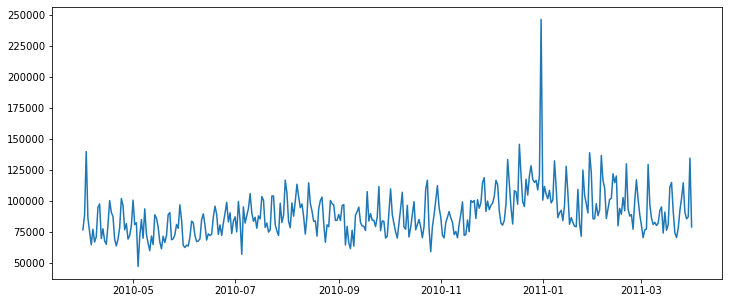

In [32]:
plt.figure(figsize=(12,5))
plt.plot(df_date)

In [36]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomp = seasonal_decompose(df_date,model='additive' )

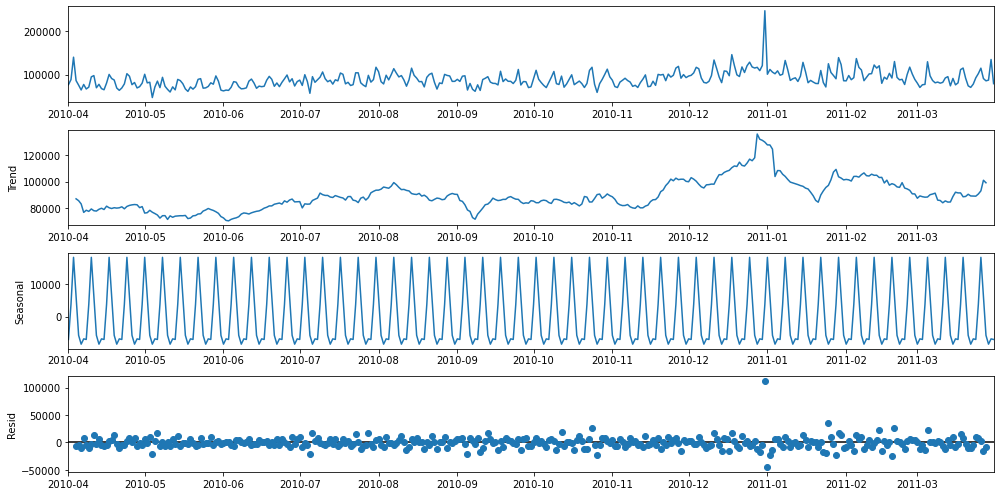

In [41]:
from pylab import rcParams
rcParams['figure.figsize'] = 14, 7
decomp.plot()
plt.show()